In [13]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [14]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('News.csv',index_col=0) 
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0


In [16]:
data.shape

(44940, 5)

In [17]:
data = data.drop(["title", "subject","date"], axis = 1)

In [26]:
data.isnull().sum()

text     21
class    42
dtype: int64

In [30]:
columns_to_check = [ 'text','class']
data = data.dropna(subset=columns_to_check)

In [31]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [32]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 


<Axes: xlabel='class', ylabel='count'>

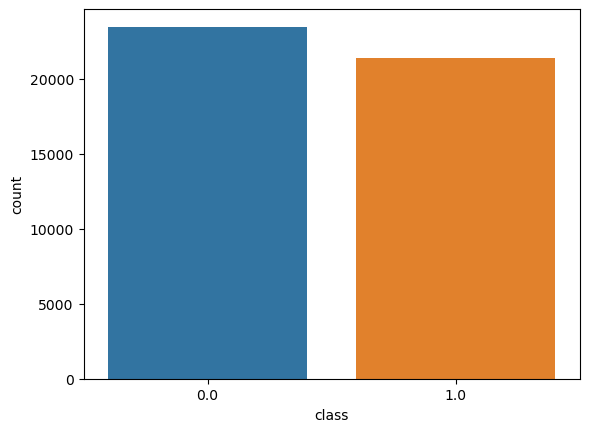

In [33]:
sns.countplot(data=data, x='class', order=data['class'].value_counts().index)


In [34]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text


In [36]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review


100%|████████████████████████████████████████████████████████████████████████████| 44898/44898 [48:34<00:00, 15.40it/s]


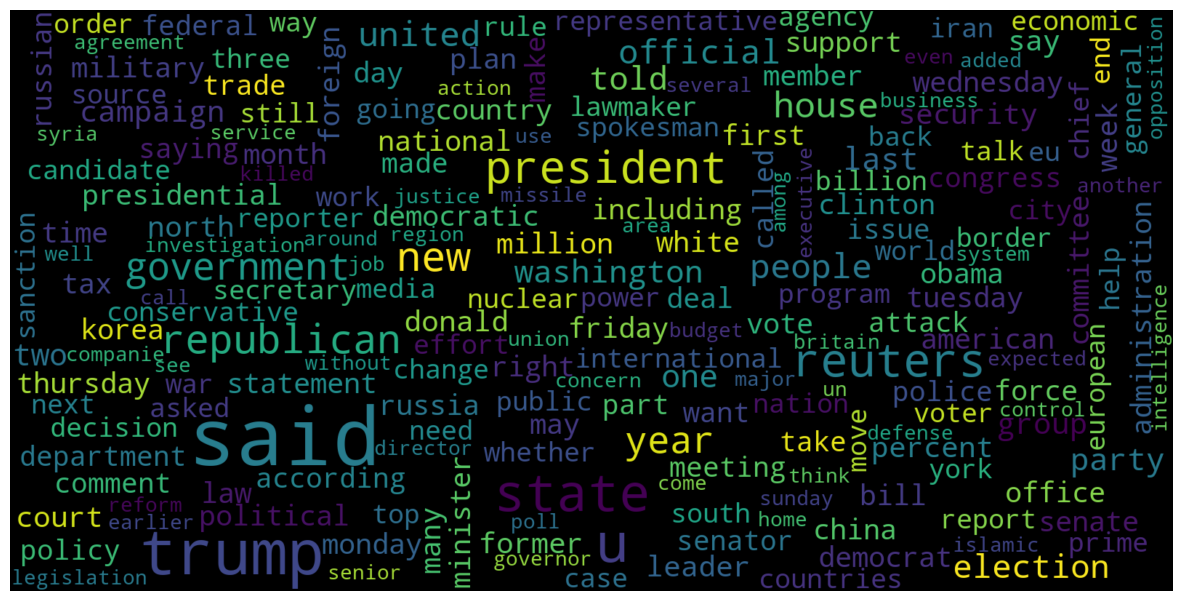

In [37]:
# Real News
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


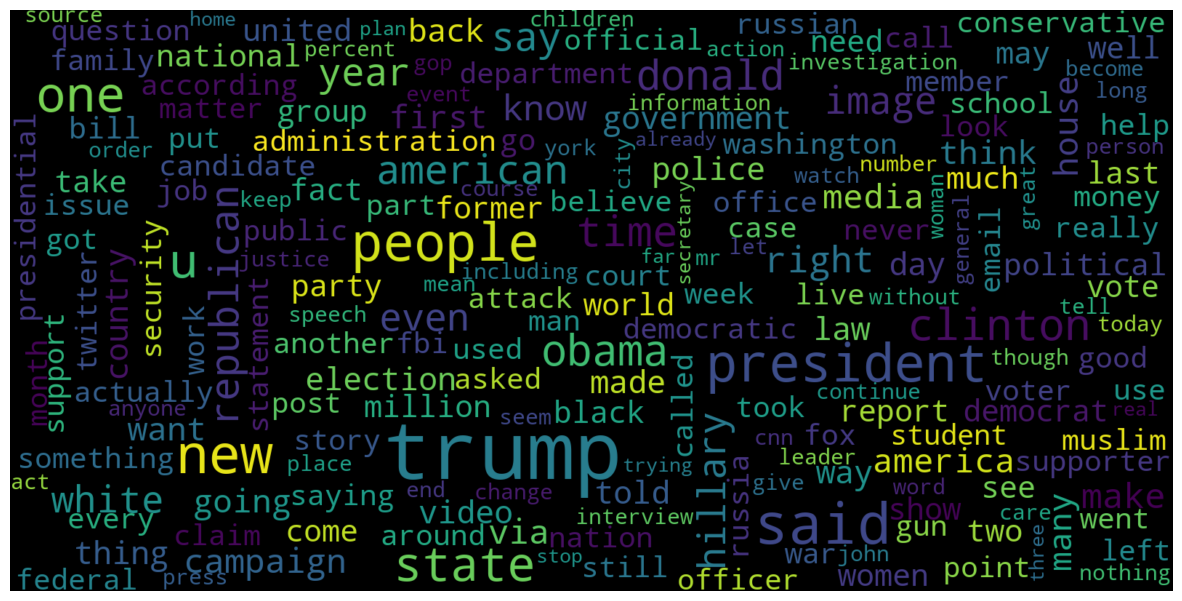

In [38]:
# Fake News
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

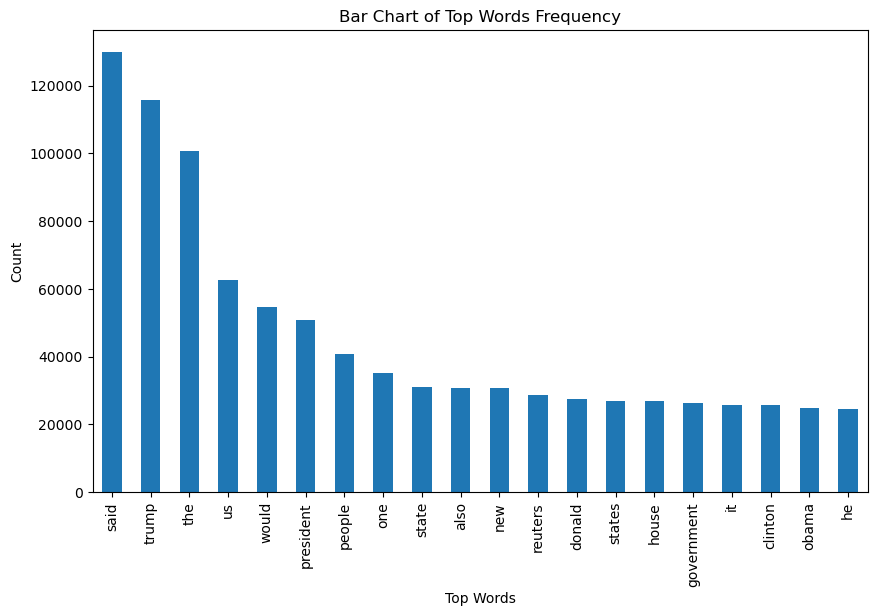

In [39]:
from sklearn.feature_extraction.text import CountVectorizer 


def get_top_n_words(corpus, n=None): 
	vec = CountVectorizer().fit(corpus) 
	bag_of_words = vec.transform(corpus) 
	sum_words = bag_of_words.sum(axis=0) 
	words_freq = [(word, sum_words[0, idx]) 
				for word, idx in vec.vocabulary_.items()] 
	words_freq = sorted(words_freq, key=lambda x: x[1], 
						reverse=True) 
	return words_freq[:n] 


common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
	kind='bar', 
	figsize=(10, 6), 
	xlabel="Top Words", 
	ylabel="Count", 
	title="Bar Chart of Top Words Frequency"
) 


In [40]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['class'], 
													test_size=0.25)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)


In [42]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 


0.9934368782110297
0.9897550111358575
